In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
strokedata = pd.read_csv(r'C:\Users\Jimmy\Desktop\ds\healthcare-dataset-stroke-data\stroke.csv')


In [122]:
strokedata = strokedata.drop(labels = 'id', axis =1)



In [125]:
strokedata['stroke'].sum()

249

In [126]:
strokedata_bmi_na0 = strokedata.copy()
strokedata_bmi_na0.fillna(0, inplace=True)
strokedata_bmi_na0.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [127]:
print(strokedata_bmi_na0['ever_married'].value_counts())
print('\n')
print(strokedata_bmi_na0['work_type'].value_counts())
print('\n')
print(strokedata_bmi_na0['Residence_type'].value_counts())
print('\n')
print(strokedata_bmi_na0['smoking_status'].value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


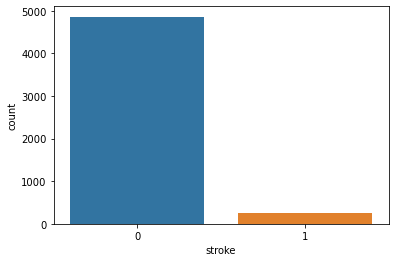

In [6]:
sns.countplot(data = strokedata_bmi_na0, x = 'stroke')

C:\Users\Jimmy\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Jimmy\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Jimmy\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


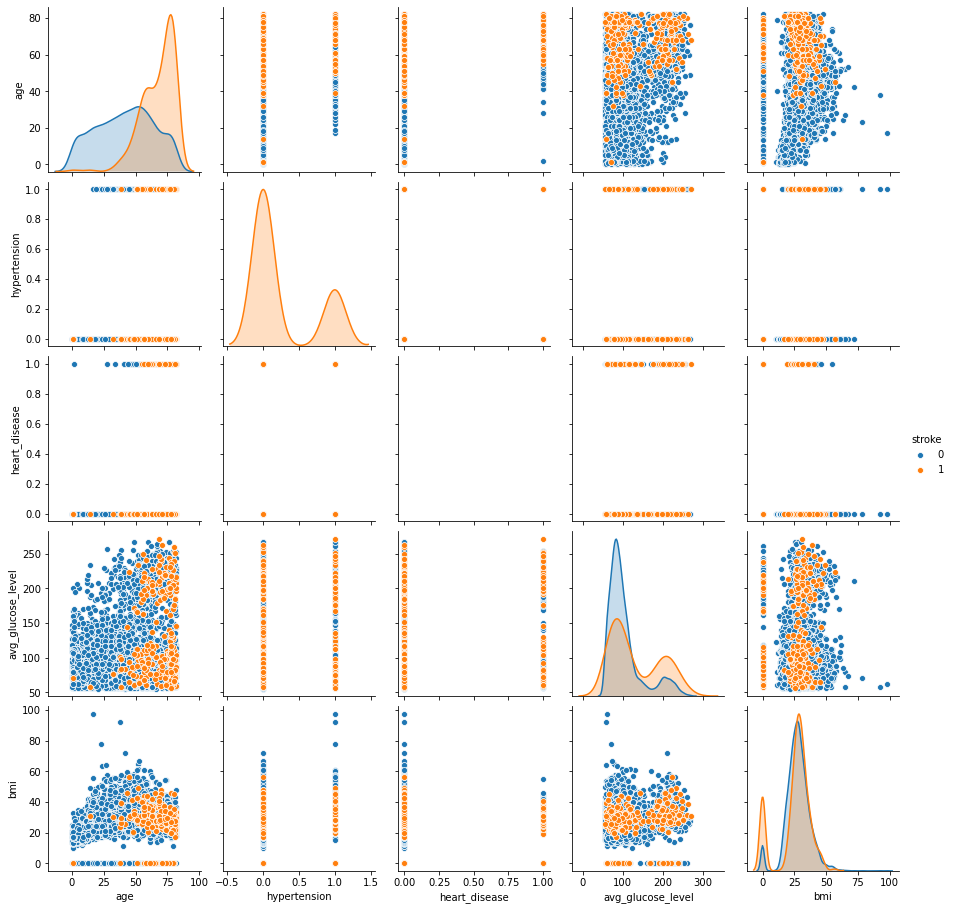

In [7]:
sns.pairplot(strokedata_bmi_na0, hue='stroke')

In [128]:
strokedata_bmi_na0[strokedata_bmi_na0['stroke']==0]['age']

249      3.0
250     58.0
251      8.0
252     70.0
253     14.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 4861, dtype: float64

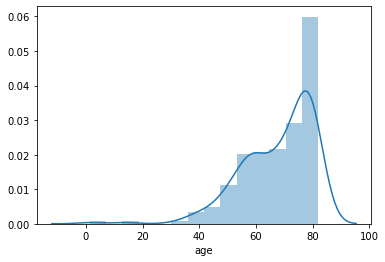

In [9]:
sns.distplot(strokedata_bmi_na0[strokedata_bmi_na0['stroke']==1]['age'])

In [129]:
stroke_byheart= strokedata_bmi_na0.groupby('heart_disease').agg({'stroke':'mean'})
stroke_bygender= strokedata_bmi_na0.groupby('gender').agg({'stroke':'mean'})
stroke_byhyper= strokedata_bmi_na0.groupby('hypertension').agg({'stroke':'mean'})
stroke_byresidence= strokedata_bmi_na0.groupby('Residence_type').agg({'stroke':'mean'})
stroke_bysmoke= strokedata_bmi_na0.groupby('smoking_status').agg({'stroke':'mean'})
stroke_bywork= strokedata_bmi_na0.groupby('work_type').agg({'stroke':'mean'})
stroke_bymarried= strokedata_bmi_na0.groupby('ever_married').agg({'stroke':'mean'})
print(stroke_byheart)
print(stroke_bygender)
print(stroke_byhyper)
print(stroke_byresidence)
print(stroke_bysmoke)
print(stroke_bywork)
print(stroke_bymarried)

                 stroke
heart_disease          
0              0.041787
1              0.170290
          stroke
gender          
Female  0.047094
Male    0.051064
Other   0.000000
                stroke
hypertension          
0             0.039679
1             0.132530
                  stroke
Residence_type          
Rural           0.045346
Urban           0.052003
                   stroke
smoking_status           
Unknown          0.030440
formerly smoked  0.079096
never smoked     0.047569
smokes           0.053232
                 stroke
work_type              
Govt_job       0.050228
Never_worked   0.000000
Private        0.050940
Self-employed  0.079365
children       0.002911
                stroke
ever_married          
No            0.016505
Yes           0.065613


In [130]:
stroke_dummies = pd.get_dummies(strokedata_bmi_na0, prefix = ['ever_married', 'work_type', 'Residence_type', 'gender', 'smoking_status'])

In [173]:
stroke_dummies

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Female,ever_married_Male,ever_married_Other,work_type_No,...,Residence_type_Never_worked,Residence_type_Private,Residence_type_Self-employed,Residence_type_children,gender_Rural,gender_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,0.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [193]:
y=stroke_dummies['stroke']
X=stroke_dummies.drop(labels='stroke', axis=1)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_Female,ever_married_Male,ever_married_Other,work_type_No,work_type_Yes,...,Residence_type_Never_worked,Residence_type_Private,Residence_type_Self-employed,Residence_type_children,gender_Rural,gender_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,0.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0.0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [157]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5000, max_depth = None, max_features = 20)
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_Female,ever_married_Male,ever_married_Other,work_type_No,work_type_Yes,...,Residence_type_Never_worked,Residence_type_Private,Residence_type_Self-employed,Residence_type_children,gender_Rural,gender_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3897,4.00,0,0,90.42,16.2,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
576,29.00,0,0,207.58,22.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4013,44.00,1,0,91.28,26.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4536,68.00,1,0,150.74,40.3,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1180,62.00,0,0,82.57,36.0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,43.00,0,0,88.00,30.6,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
466,61.00,1,0,170.05,60.2,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3092,1.16,0,0,97.28,17.8,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3772,80.00,0,0,196.08,31.0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [17]:
forest.fit(X_train, y_train)


RandomForestClassifier(max_features=20, n_estimators=5000)

In [18]:
preds = forest.predict(X_test)


In [19]:
preds.sum()

6

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
forest.score(X_test, y_test)

0.9419439008480104

In [22]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
      

[[1441    3]
 [  86    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.50      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.72      0.52      0.52      1533
weighted avg       0.92      0.94      0.92      1533



In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logres = LogisticRegression(penalty = 'l1', C = 10000, tol = 0.001, max_iter = 10000, verbose = 1, solver = 'saga')

In [25]:
logres.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 762 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(C=10000, max_iter=10000, penalty='l1', solver='saga',
                   tol=0.001, verbose=1)

In [26]:
preds = logres.predict(X_test)
preds.sum()

6

In [27]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.50      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.72      0.52      0.52      1533
weighted avg       0.92      0.94      0.92      1533

[[1441    3]
 [  86    3]]


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
boost = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 1000, max_depth = 10, verbose = 1)

In [30]:
boost.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2399           29.97s
         2           0.1968           19.96s
         3           0.1763           19.94s
         4           0.1586           19.92s
         5           0.1449           17.91s
         6           0.1313           18.22s
         7           0.1180           18.44s
         8           0.1060           18.60s
         9           0.0972           18.72s
        10           0.0868           18.81s
        20           0.0381           17.84s
        30           0.0184           18.24s
        40           0.0106           18.10s
        50           0.0067           17.80s
        60           0.0044           17.50s
        70           0.0030           17.50s
        80           0.0019           17.14s
        90           0.0013           16.78s
       100           0.0009           16.56s
       200           0.0000           14.71s
       300           0.0000           12.90s
       40

GradientBoostingClassifier(max_depth=10, n_estimators=1000, verbose=1)

In [31]:
preds = boost.predict(X_test)
preds.sum()

7

In [32]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.43      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.69      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533

[[1440    4]
 [  86    3]]


In [33]:
from sklearn.svm import SVC

In [91]:
sv = SVC(class_weight = 'balanced', gamma = 0.0001)


In [92]:
sv.fit(X_train, y_train)

SVC(class_weight='balanced', gamma=0.0001)

In [93]:
preds = sv.predict(X_test)
preds.sum()

443

In [94]:
dec_thresh = sv.decision_function(X_test) > -1
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1444
           1       0.15      0.75      0.25        89

    accuracy                           0.74      1533
   macro avg       0.57      0.75      0.55      1533
weighted avg       0.93      0.74      0.81      1533



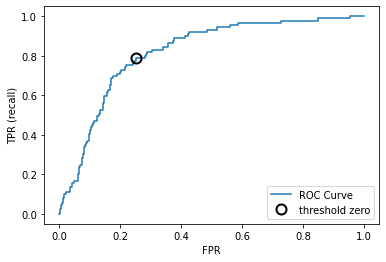

In [90]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, sv.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

gamma = 1.00 accuracy = 0.94 AUC = 0.65
gamma = 0.05 accuracy = 0.91 AUC = 0.69
gamma = 0.01 accuracy = 0.80 AUC = 0.71
gamma = 0.00 accuracy = 0.74 AUC = 0.83


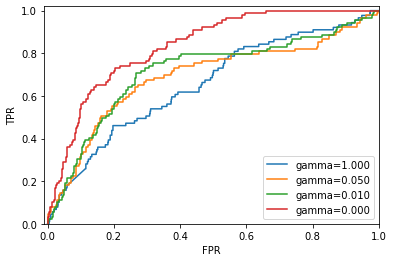

In [81]:
from sklearn.metrics import roc_auc_score
plt.figure()
for gamma in [1, 0.05, 0.01, 0.0001]:
    svc = SVC(gamma=gamma, class_weight = 'balanced').fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
    gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [95]:
from sklearn.utils import resample

In [540]:
X_first, X_final, y_first, y_final = train_test_split(X, y, test_size=0.3, random_state=1)

In [541]:
y_first.sum()

166

In [543]:
X_first.loc[:,'stroke'] = y_first
stroke_nofinal = X_first
stroke_nofinal['stroke'].sum()


166

In [544]:
X_sec = stroke_nofinal.drop(labels = 'stroke', axis =1)
y_sec = stroke_nofinal['stroke']

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X_sec, y_sec, test_size=0.3, random_state=1)
len(y_test)
print(y_test.sum())

43


In [546]:
X_train.loc[:,'stroke'] = y_train
stroke_tobeupsampled = X_train

In [547]:
data_majority = stroke_tobeupsampled[stroke_tobeupsampled['stroke']==0]
data_minority = stroke_tobeupsampled[stroke_tobeupsampled['stroke']==1]
data_minority_upsample = resample(data_minority, replace=True, n_samples=2000, random_state=1)
upsampled_data = pd.concat([data_majority, data_minority_upsample])


In [548]:
X_val = upsampled_data.drop(labels = 'stroke', axis = 1)
y_val = upsampled_data['stroke']
y_val.sum()

2000

In [549]:
svc = SVC(probability = True, gamma = .00001, C=1)

In [550]:
svc.fit(X_val, y_val)

SVC(C=1, gamma=1e-05, probability=True)

In [528]:
len(X_test)

1074

In [561]:
preds = svc.predict(X_final)
#sns.distplot(svc.decision_function(X_test))
preds_lenient = svc.decision_function(X_final) > -0
#print(svc.predict_proba(X_test))

In [559]:
svc.score(X_final, y_final)

0.7625570776255708

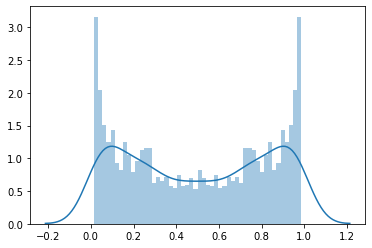

In [450]:
sns.distplot(svc.predict_proba(X_test), bins = 50)

In [562]:
print(classification_report(y_final, preds_lenient))
print(confusion_matrix(y_final, preds_lenient))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1450
           1       0.16      0.77      0.26        83

    accuracy                           0.76      1533
   macro avg       0.57      0.77      0.56      1533
weighted avg       0.94      0.76      0.83      1533

[[1105  345]
 [  19   64]]


gamma = 0.00 accuracy = 0.79 AUC = 0.81
gamma = 0.00 accuracy = 0.76 AUC = 0.81
gamma = 0.00 accuracy = 0.73 AUC = 0.82


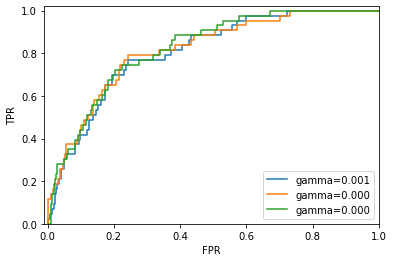

In [551]:
from sklearn.metrics import roc_auc_score
plt.figure()
for gamma in [.001, .0001, .00001]:
        svc = SVC(gamma=gamma, C=1).fit(X_val, y_val)
        accuracy = svc.score(X_test, y_test)
        auc = roc_auc_score(y_test, svc.decision_function(X_test))
        fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
        print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
        gamma, accuracy, auc))
        plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

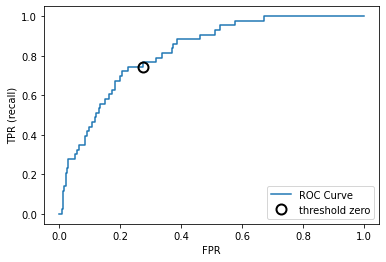

In [557]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

